<a href="https://colab.research.google.com/github/SkyTong/DS440/blob/main/LSTM_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
merged_data = pd.read_csv('/content/processed_hourly_data.csv',index_col=0)
merged_data

,Datetime,SP500,DOW30,EuroStoxx50,NASDAQ,CrudeOil,SSE,Gold,VIX,Nikkei225,...,total_volume_quote,total_volume_base,total_volume_total,volume,high,low,open,close,volumefrom,volumeto
667,2022-02-28 10:00:00-05:00,4360.924805,33767.826172,3915.540039,13709.718262,95.510002,3457.902100,1910.400024,30.559999,26522.330078,...,4.074564e+08,8.501518e+09,8.908974e+09,100298.59,40917.71,39652.14,39849.29,40845.79,7495.87,3.026021e+08
668,2022-02-28 11:00:00-05:00,4369.179932,33849.894531,3933.479980,13734.242676,95.440002,3457.902100,1894.500000,28.690001,26522.330078,...,2.951618e+08,7.640820e+09,7.935982e+09,71235.25,41338.07,40736.36,40845.79,41021.81,5232.77,2.148198e+08
669,2022-02-28 12:00:00-05:00,4349.699951,33720.744141,3933.479980,13666.251465,96.209999,3457.902100,1900.900024,30.639999,26522.330078,...,2.022620e+08,6.928419e+09,7.130681e+09,40264.68,41320.14,40768.17,41021.81,41319.61,2842.60,1.165622e+08
670,2022-02-28 13:00:00-05:00,4332.359863,33589.654297,3933.479980,13607.824707,96.459999,3457.902100,1900.699951,30.820000,26522.330078,...,1.731512e+08,6.676633e+09,6.849784e+09,34319.26,41427.99,41082.37,41319.61,41217.44,2455.10,1.013162e+08
671,2022-02-28 14:00:00-05:00,4331.229980,33588.664062,3933.479980,13605.203125,95.680000,3457.902100,1908.300049,31.920000,26522.330078,...,1.655895e+08,5.810772e+09,5.976362e+09,28324.04,41377.67,41057.84,41217.44,41357.77,2007.00,8.271987e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,2024-02-20 11:00:00-05:00,4969.645020,38550.503906,4763.259766,15567.405273,78.860001,2920.561279,2038.500000,15.580000,38409.390625,...,1.727552e+09,1.730651e+09,3.458204e+09,33578.32,51795.47,51369.97,51693.91,51396.39,1748.02,9.020375e+07
18065,2024-02-20 12:00:00-05:00,4961.074951,38504.060547,4763.259766,15532.355957,79.169998,2920.561279,2040.000000,15.640000,38409.390625,...,3.983693e+08,3.721585e+09,4.119954e+09,44409.48,51397.71,50766.77,51396.39,51321.90,3702.71,1.892794e+08
18066,2024-02-20 13:00:00-05:00,4965.669922,38540.031250,4763.259766,15555.064941,79.230003,2920.561279,2038.599976,15.500000,38409.390625,...,1.272772e+08,1.996156e+09,2.123433e+09,22321.76,51536.57,51236.14,51321.90,51504.22,1518.03,7.796947e+07
18067,2024-02-20 14:00:00-05:00,4973.215088,38575.441406,4763.259766,15592.756348,78.269997,2920.561279,2036.500000,15.330000,38409.390625,...,2.904525e+08,2.182250e+09,2.472703e+09,28053.63,52111.16,51439.74,51504.22,52095.65,1791.37,9.274488e+07


In [ ]:

"""
# Remove the first column
merged_data = merged_data.drop(merged_data.columns[0], axis=1)

# Now org_df will have the first column removed
merged_data
"""

'\n# Remove the first column\nmerged_data = merged_data.drop(merged_data.columns[0], axis=1)\n\n# Now org_df will have the first column removed\nmerged_data\n'

In [ ]:

merged_data.set_index('Datetime', inplace=True)
merged_data.index


Index(['2022-02-28 10:00:00-05:00', '2022-02-28 11:00:00-05:00',
       '2022-02-28 12:00:00-05:00', '2022-02-28 13:00:00-05:00',
       '2022-02-28 14:00:00-05:00', '2022-02-28 15:00:00-05:00',
       '2022-02-28 16:00:00-05:00', '2022-02-28 17:00:00-05:00',
       '2022-02-28 18:00:00-05:00', '2022-02-28 19:00:00-05:00',
       ...
       '2024-02-20 06:00:00-05:00', '2024-02-20 07:00:00-05:00',
       '2024-02-20 08:00:00-05:00', '2024-02-20 09:00:00-05:00',
       '2024-02-20 10:00:00-05:00', '2024-02-20 11:00:00-05:00',
       '2024-02-20 12:00:00-05:00', '2024-02-20 13:00:00-05:00',
       '2024-02-20 14:00:00-05:00', '2024-02-20 15:00:00-05:00'],
      dtype='object', name='Datetime', length=12447)

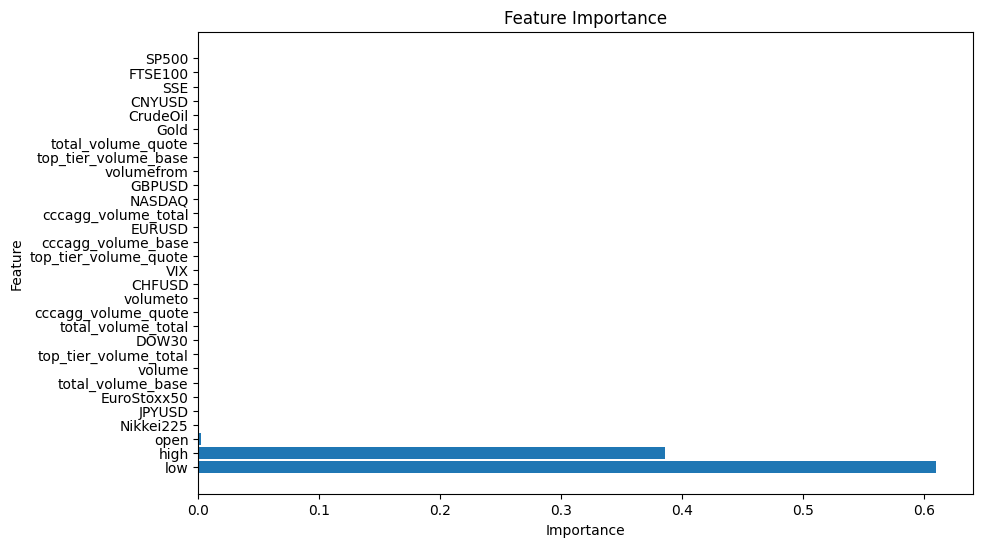

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Prepare data
X = merged_data.drop(columns=['close'])  # Features
y = merged_data['close']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Feature importance
feature_importance = xgb_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


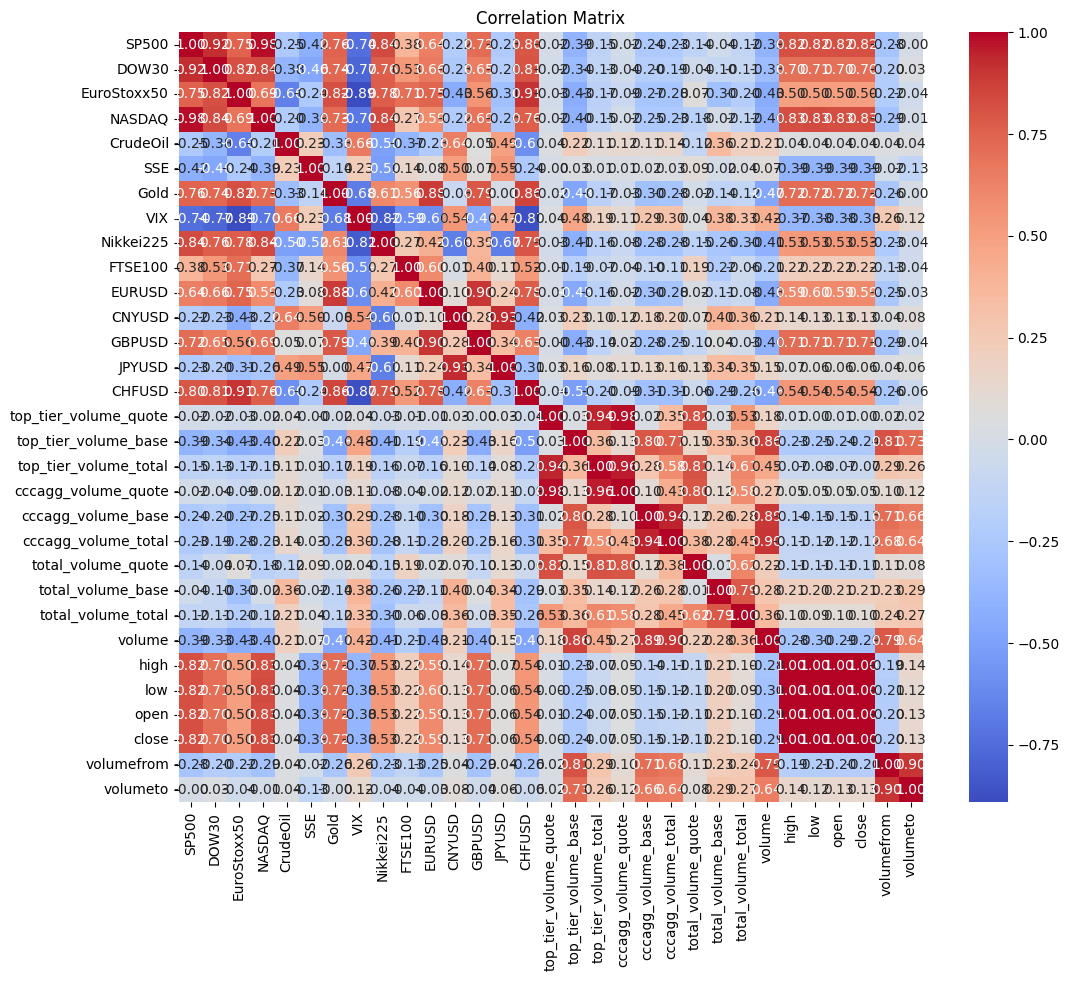

In [ ]:

import seaborn as sns

# Drop 'high' and 'low' columns


# Calculate correlation matrix
corr_matrix = merged_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



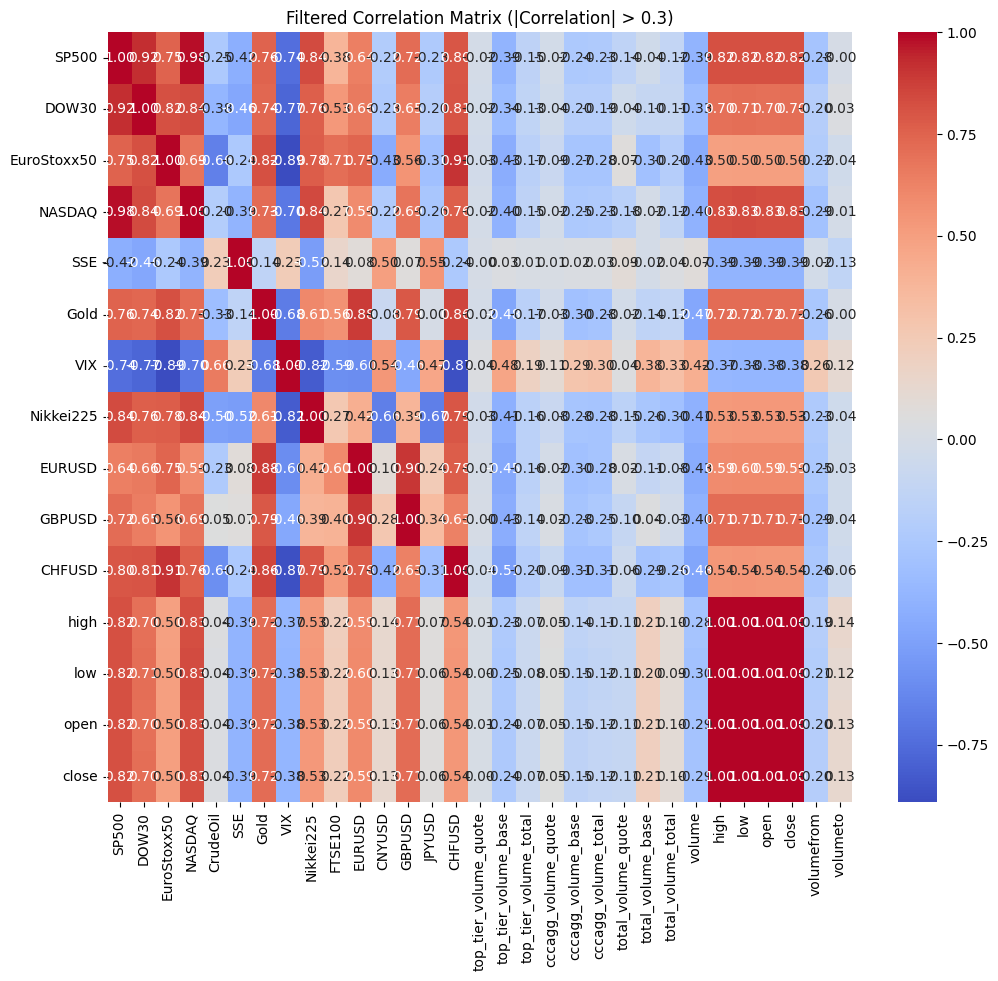

In [ ]:
filtered_corr_matrix = corr_matrix[(corr_matrix['close'] < -0.3) | (corr_matrix['close'] > 0.3)]

# Plot the filtered correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Filtered Correlation Matrix (|Correlation| > 0.3)')
plt.show()

#configuration

In [ ]:
expr_name = 'expr_1'
look_back = 60
lstm_layers = 32
epochs=3
batch_size=32

#Dataset scalling

In [ ]:
# Extract y-axis columns from the filtered correlation matrix
y_axis_columns = filtered_corr_matrix.index

# Print the extracted columns
print(y_axis_columns)



Index(['SP500', 'DOW30', 'EuroStoxx50', 'NASDAQ', 'SSE', 'Gold', 'VIX',
       'Nikkei225', 'EURUSD', 'GBPUSD', 'CHFUSD', 'high', 'low', 'open',
       'close'],
      dtype='object')


In [ ]:
# List of columns to keep from corr_merged_data

columns_to_keep = y_axis_columns



# Filter the merged_data DataFrame to keep only the desired columns
filtered_merged_data = merged_data[columns_to_keep]

# Additionally, add back the 'Datetime' column to filtered_merged_data
# if it was removed previously
"""
if 'Date' in merged_data.columns:
    filtered_merged_data['Date'] = merged_data['Date']


# Reorder columns in filtered_merged_data DataFrame
filtered_merged_data = filtered_merged_data[['Date'] + [col for col in filtered_merged_data.columns if col != 'Date']]

# Now, the 'Datetime' column should be the first column in filtered_merged_data

# Now, filtered_merged_data should have the same columns as corr_merged_data (except 'Datetime')
# and still contain the 'Datetime' column
filtered_merged_data
"""

"\nif 'Date' in merged_data.columns:\n    filtered_merged_data['Date'] = merged_data['Date']\n\n\n# Reorder columns in filtered_merged_data DataFrame\nfiltered_merged_data = filtered_merged_data[['Date'] + [col for col in filtered_merged_data.columns if col != 'Date']]\n\n# Now, the 'Datetime' column should be the first column in filtered_merged_data\n\n# Now, filtered_merged_data should have the same columns as corr_merged_data (except 'Datetime')\n# and still contain the 'Datetime' column\nfiltered_merged_data\n"

In [ ]:
filtered_merged_data

,SP500,DOW30,EuroStoxx50,NASDAQ,SSE,Gold,VIX,Nikkei225,EURUSD,GBPUSD,CHFUSD,high,low,open,close
Datetime,,,,,,,,,,,,,,,
2022-02-28 10:00:00-05:00,4360.924805,33767.826172,3915.540039,13709.718262,3457.902100,1910.400024,30.559999,26522.330078,1.123469,1.341814,1.089978,40917.71,39652.14,39849.29,40845.79
2022-02-28 11:00:00-05:00,4369.179932,33849.894531,3933.479980,13734.242676,3457.902100,1894.500000,28.690001,26522.330078,1.122460,1.341832,1.089514,41338.07,40736.36,40845.79,41021.81
2022-02-28 12:00:00-05:00,4349.699951,33720.744141,3933.479980,13666.251465,3457.902100,1900.900024,30.639999,26522.330078,1.120699,1.339011,1.088459,41320.14,40768.17,41021.81,41319.61
2022-02-28 13:00:00-05:00,4332.359863,33589.654297,3933.479980,13607.824707,3457.902100,1900.699951,30.820000,26522.330078,1.121579,1.341058,1.090215,41427.99,41082.37,41319.61,41217.44
2022-02-28 14:00:00-05:00,4331.229980,33588.664062,3933.479980,13605.203125,3457.902100,1908.300049,31.920000,26522.330078,1.122586,1.341886,1.091227,41377.67,41057.84,41217.44,41357.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-20 11:00:00-05:00,4969.645020,38550.503906,4763.259766,15567.405273,2920.561279,2038.500000,15.580000,38409.390625,1.081666,1.264191,1.135435,51795.47,51369.97,51693.91,51396.39
2024-02-20 12:00:00-05:00,4961.074951,38504.060547,4763.259766,15532.355957,2920.561279,2040.000000,15.640000,38409.390625,1.081432,1.263552,1.134778,51397.71,50766.77,51396.39,51321.90
2024-02-20 13:00:00-05:00,4965.669922,38540.031250,4763.259766,15555.064941,2920.561279,2038.599976,15.500000,38409.390625,1.081315,1.262467,1.134340,51536.57,51236.14,51321.90,51504.22


In [ ]:
"""
dataset = merged_data.values
target_variable = 'close'
y = df[target_variable].values

# Feature scaling
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
num_of_features = len(merged_data.columns)
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
"""
# Assuming 'Datetime' is the timestamp column in your DataFrame
timestamp_column = 'Date'

# Drop the timestamp column before transforming
merged_data_no_timestamp = filtered_merged_data.drop(columns=[timestamp_column])
"""
# Convert the remaining data to float32
dataset = filtered_merged_data.values.astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Check the number of features
num_of_features = dataset.shape[1]
print('Number of features:', num_of_features)

Number of features: 15


In [ ]:
train_size_percent = 0.80
pred_col = num_of_features - 1  # Update pred_col to last column index

# function to split the data
def create_dataset(dataset, pred_col, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)

train_size = int(len(dataset) * train_size_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Set look_back
look_back = 1  # You might want to adjust this according to your needs

trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)
# reshape input to be  [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_of_features))
testX = np.reshape(testX, (testX.shape[0], look_back, num_of_features))

print('Training dataset length ', len(train))
print('Testing dataset length ', len(test))
print('look_back ', look_back)


Training dataset length  9957
Testing dataset length  2490
look_back  1


#model

In [ ]:
!git clone https://github.com/lessw2020/Ranger-Deep-Learning-Optimizer.git



Cloning into 'Ranger-Deep-Learning-Optimizer'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 148 (delta 44), reused 30 (delta 30), pack-reused 89
Receiving objects: 100% (148/148), 186.77 KiB | 5.66 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
import sys
sys.path.append("/content/Ranger-Deep-Learning-Optimizer")

from ranger import Ranger


In [ ]:
#tester
import tensorflow as tf
#from ranger import Ranger
# Drop the timestamp column from trainX and testX
trainX_no_timestamp = trainX[:, :, :num_of_features-1]
testX_no_timestamp = testX[:, :, :num_of_features-1]

# Build the LSTM model
model = Sequential()
model.add(LSTM(lstm_layers, input_shape=(look_back, num_of_features-1)))
model.add(Dense(1))

# Instantiate the Ranger optimizer with default parameters
adam_optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compile the model with the Adam optimizer
model.compile(loss='mean_squared_error', optimizer=adam_optimizer)

# Train the model
history = model.fit(trainX_no_timestamp, trainY, validation_split=0.30, epochs=epochs, batch_size=batch_size, shuffle=False)




Epoch 1/3
218/218 [==============================] - 4s 6ms/step - loss: 0.0307 - val_loss: 0.0022
Epoch 2/3
218/218 [==============================] - 1s 4ms/step - loss: 0.0068 - val_loss: 0.0026
Epoch 3/3
218/218 [==============================] - 1s 4ms/step - loss: 0.0049 - val_loss: 0.0018


plot training

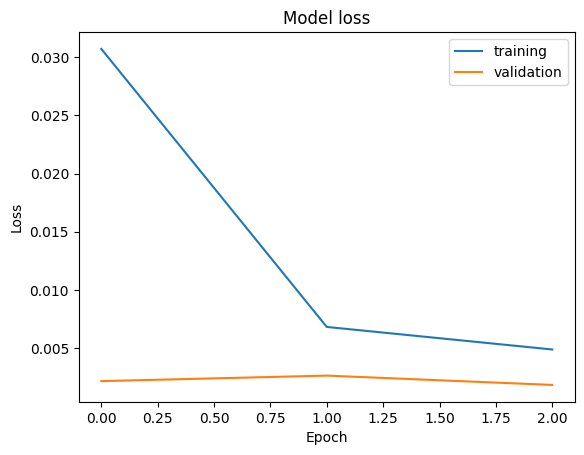

In [ ]:
import matplotlib.pyplot as plt

# Plot training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
print("Original shapes:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

print("Original shapes:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)



Original shapes:
trainX shape: (9955, 1, 15)
testX shape: (2488, 1, 15)
Original shapes:
trainX shape: (9955, 1, 15)
testX shape: (2488, 1, 15)


In [ ]:
print("Before reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

# Perform reshape operation
trainX = np.reshape(trainX[:, :, :num_of_features - 1], (trainX.shape[0], look_back, num_of_features - 1))
testX = np.reshape(testX[:, :, :num_of_features - 1], (testX.shape[0], look_back, num_of_features - 1))

print("After reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)


Before reshaping:
trainX shape: (9955, 1, 15)
testX shape: (2488, 1, 15)
After reshaping:
trainX shape: (9955, 1, 14)
testX shape: (2488, 1, 14)


#testing

In [ ]:
print("trainX shape before reshaping:", trainX.shape)
print("testX shape before reshaping:", testX.shape)


trainX shape before reshaping: (9955, 1, 14)
testX shape before reshaping: (2488, 1, 14)


In [ ]:
print("Size of trainX array:", trainX.size)
print("Size of testX array:", testX.size)


Size of trainX array: 139370
Size of testX array: 34832


In [ ]:
\

import numpy as np

print("Before reshaping:")
print("trainX shape:", trainX.shape)
print("testX shape:", testX.shape)

look_back = 1
num_of_features = 12  # Corrected number of features

# Perform reshape operation
new_shape = (testX.size // (look_back * num_of_features), look_back, num_of_features)
New_Shape = (trainX.size // (look_back * num_of_features), look_back, num_of_features)
try:
    trainX_temp = testX.reshape(new_shape)
    testX_temp = trainX.reshape(New_Shape)
    print("After reshaping:")
    print("trainX shape:", trainX_temp.shape)
    print("testX shape:", testX_temp.shape)
except ValueError as e:
    print("Error during reshaping:", e)

Before reshaping:
trainX shape: (9955, 1, 14)
testX shape: (2488, 1, 14)
Error during reshaping: cannot reshape array of size 34832 into shape (2902,1,12)


In [ ]:
#import numpy as np

#print("Before reshaping:")
#print("trainX shape:", trainX.shape)
#print("testX shape:", testX.shape)

#look_back = 1
#num_of_features = 12  # Corrected number of features

# Perform reshape operation
#new_shape = (testX.size, (look_back * num_of_features), look_back, num_of_features)
#try:
    #trainX = np.reshape(trainX, new_shape)
    #testX = np.reshape(testX, new_shape)
    #print("After reshaping:")
    #print("trainX shape:", trainX.shape)
    #print("testX shape:", testX.shape)
#except ValueError as e:
    #print("Error during reshaping:", e)


#End test

In [ ]:

# Check and drop unnecessary columns
columns_to_drop = ['high', 'low']
filtered_merged_data.drop(columns=[col for col in columns_to_drop if col in filtered_merged_data.columns], inplace=True)
num_features = filtered_merged_data.shape[1]
print("Number of features:", num_features)

Number of features: 13


<ipython-input-24-704f1055b065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_data.drop(columns=[col for col in columns_to_drop if col in filtered_merged_data.columns], inplace=True)


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
df = filtered_merged_data

# Prepare features and target
features = df.drop(columns=['close'])
target = df['close']

# Scale features and target
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state=42)

# Reshape data for LSTM model
timesteps = num_features-1
features_per_timestep = 1

X_train_reshaped = X_train.reshape(-1, timesteps, features_per_timestep)
X_test_reshaped = X_test.reshape(-1, timesteps, features_per_timestep)

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, features_per_timestep)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=20, validation_split=0.2)

# Predict using the trained model
trainPredict = model.predict(X_train_reshaped)
testPredict = model.predict(X_test_reshaped)

# Inverse transform predictions and actuals to calculate RMSE
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate and print RMSE and MAE
trainScore_RMSE = math.sqrt(mean_squared_error(y_train_inv, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(y_test_inv, testPredict))

trainScore_MAE = mean_absolute_error(y_train_inv, trainPredict)
testScore_MAE = mean_absolute_error(y_test_inv, testPredict)


print(f'Train RMSE: {trainScore_RMSE}')
print(f'Test RMSE: {testScore_RMSE}')

print(f'Train MAE: {trainScore_MAE}')
print(f'Test MAE: {testScore_MAE}')


Epoch 1/20
399/399 [==============================] - 6s 11ms/step - loss: 0.0197 - val_loss: 0.0101
Epoch 2/20
399/399 [==============================] - 3s 7ms/step - loss: 0.0030 - val_loss: 1.5172e-04
Epoch 3/20
399/399 [==============================] - 3s 7ms/step - loss: 1.2518e-04 - val_loss: 5.7433e-05
Epoch 4/20
399/399 [==============================] - 3s 8ms/step - loss: 6.0075e-05 - val_loss: 4.0107e-05
Epoch 5/20
399/399 [==============================] - 4s 10ms/step - loss: 4.9643e-05 - val_loss: 7.8129e-05
Epoch 6/20
399/399 [==============================] - 3s 8ms/step - loss: 4.5467e-05 - val_loss: 3.8882e-05
Epoch 7/20
399/399 [==============================] - 3s 7ms/step - loss: 4.6784e-05 - val_loss: 3.9790e-05
Epoch 8/20
399/399 [==============================] - 3s 7ms/step - loss: 4.5701e-05 - val_loss: 1.0354e-04
Epoch 9/20
399/399 [==============================] - 4s 10ms/step - loss: 4.5014e-05 - val_loss: 2.5790e-04
Epoch 10/20
399/399 [================

In [ ]:
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Assuming your model input shape is (look_back, num_of_features)
num_of_features = 12  # Update this value if needed

# Perform predictions
trainPredict = model.predict(trainX_temp)
testPredict = model.predict(testX_temp)

pred_col_new = pred_col - 1

# Check if pred_col_new is within bounds
if pred_col_new < num_of_features:
    # Get something which has as many features as the dataset
    trainPredict_extended = np.zeros((len(trainPredict), num_of_features))
    # Put the predictions there
    trainPredict_extended[:, pred_col_new] = trainPredict[:, 0]
    # Inverse transform it and select the pred_col column.
    trainPredict = scaler.inverse_transform(trainPredict_extended)[:, pred_col_new]
else:
    print("Error: pred_col is out of bounds")

# Get something which has as many features as the dataset
testPredict_extended = np.zeros((len(testPredict), num_of_features))
# Put the predictions there
testPredict_extended[:, pred_col - 1] = testPredict[:, 0]
# Inverse transform it and select the pred_col column.
testPredict = scaler.inverse_transform(testPredict_extended)[:, pred_col - 1]

# Calculate root mean squared error
trainScore_RMSE = math.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = math.sqrt(mean_squared_error(testY, testPredict))

# Calculate absolute mean error
trainScore_MAE = np.sum(np.absolute(trainY - trainPredict)) / len(trainY)
testScore_MAE = np.sum(np.absolute(testY - testPredict)) / len(testY)

print(f'Train RMSE: {trainScore_RMSE}')
print(f'Test RMSE: {testScore_RMSE}')

print(f'Train MAE: {trainScore_MAE}')
print(f'Test MAE: {testScore_MAE}')
"""

'\nimport pandas as pd\nimport numpy as np\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.metrics import mean_squared_error\nimport math\n\n# Assuming your model input shape is (look_back, num_of_features)\nnum_of_features = 12  # Update this value if needed\n\n# Perform predictions\ntrainPredict = model.predict(trainX_temp)\ntestPredict = model.predict(testX_temp)\n\npred_col_new = pred_col - 1\n\n# Check if pred_col_new is within bounds\nif pred_col_new < num_of_features:\n    # Get something which has as many features as the dataset\n    trainPredict_extended = np.zeros((len(trainPredict), num_of_features))\n    # Put the predictions there\n    trainPredict_extended[:, pred_col_new] = trainPredict[:, 0]\n    # Inverse transform it and select the pred_col column.\n    trainPredict = scaler.inverse_transform(trainPredict_extended)[:, pred_col_new]\nelse:\n    print("Error: pred_col is out of bounds")\n\n# Get something which has as many features as the dataset\ntestPred

experminent details

In [ ]:
print('-' * 50)
print('Experiment name:', expr_name)

print('-' * 50)
print('look_back days:', look_back/24)
print('lstm_layers:', lstm_layers)
print('epochs:', epochs)
print('batch_size:', batch_size)
print('dataset features', list(merged_data.columns))


print('-' * 50)
print('Train Score: %.2f RMSE' % (trainScore_RMSE))
print('Test Score: %.2f RMSE' % (testScore_RMSE))

print('-' * 50)
print('Train Score: %.2f MAE' % (trainScore_MAE))
print('Test Score: %.2f MAE' % (testScore_MAE))

print('-' * 50)
print('Model summary:')
model.summary()

--------------------------------------------------
Experiment name: expr_1
--------------------------------------------------
look_back days: 0.041666666666666664
lstm_layers: 32
epochs: 3
batch_size: 32
dataset features ['SP500', 'DOW30', 'EuroStoxx50', 'NASDAQ', 'CrudeOil', 'SSE', 'Gold', 'VIX', 'Nikkei225', 'FTSE100', 'EURUSD', 'CNYUSD', 'GBPUSD', 'JPYUSD', 'CHFUSD', 'top_tier_volume_quote', 'top_tier_volume_base', 'top_tier_volume_total', 'cccagg_volume_quote', 'cccagg_volume_base', 'cccagg_volume_total', 'total_volume_quote', 'total_volume_base', 'total_volume_total', 'volume', 'high', 'low', 'open', 'close', 'volumefrom', 'volumeto']
--------------------------------------------------
Train Score: 198.39 RMSE
Test Score: 190.88 RMSE
--------------------------------------------------
Train Score: 134.13 MAE
Test Score: 133.11 MAE
--------------------------------------------------
Model summary:
Model: "sequential_1"
_________________________________________________________________


#Plot

In [ ]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, pred_col] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, pred_col] = testPredict
"""
"""
# contruct pandas dataframe for plotting
time_df = pd.DataFrame(merged_data_no_timestamp.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('Datetime',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")


ValueError: could not broadcast input array from shape (9957,1) into shape (9957,)

In [ ]:
#time_df = pd.DataFrame(merged_data_no_timestamp.index)
#time_df

In [ ]:
"""
# contruct pandas dataframe for plotting
time_df = pd.DataFrame(merged_data_no_timestamp.index)
time_df['Actual'] = scaler.inverse_transform(dataset)[:,pred_col]
df1 = pd.DataFrame(trainPredictPlot[:,pred_col],columns=['Train'])
df2 = pd.DataFrame(testPredictPlot[:,pred_col],columns=['Test'])
time_df2 = pd.concat([time_df, df1, df2], axis=1, sort=False)
time_df2.set_index('Datetime',inplace=True)

# plot the output
fig, ax = plt.subplots(figsize=(15,7))
time_df2.plot(ax=ax,rot=90,alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Bitcoin Value')
plt.title('Bitcoin Price Prediction')
plt.savefig(expr_name + '.png',bbox_inches = "tight")
"""